In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import xicorpy as xi
import shap
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nelson = pd.read_csv('datasets/Nelson.csv',index_col=False)

In [3]:
nelson.dropna(inplace=True)
nelson.index = nelson.date
nelson.index = pd.to_datetime(nelson.index)
nelson = nelson[['Nelson', 'lagged']]
nelson.head(5)

,Nelson,lagged
date,,
1992-02-29,108000.0,115000.0
1992-03-31,115000.0,108000.0
1992-04-30,116000.0,115000.0
1992-05-31,115000.0,116000.0
1992-06-30,107000.0,115000.0


# Other datasets

In [4]:
headers = [
    "Real_GDP_Production-based_$m",
    "Real_GDP_Production-based_$m_s.a.",
    "Real_GDP_Production-based_q/q%_s.a.",
    "Real_GDP_Production-based_y/y%",
    "Nominal_GDP_Expenditure-based_$m",
    "Nominal_GDP_Expenditure-based_$m_s.a.",
    "Nominal_GDP_Expenditure-based_q/q%_s.a.",
    "Nominal_GDP_Expenditure-based_y/y%",
    "Real_GDP_Expenditure-based_$m",
    "Real_GDP_Expenditure-based_$m_s.a.",
    "Real_GDP_Expenditure-based_q/q%_s.a.",
    "Real_GDP_Expenditure-based_y/y%",
    "Nominal_Private_consumption_$m",
    "Nominal_Private_consumption_$m_s.a.",
    "Nominal_Private_consumption_q/q%_s.a.",
    "Nominal_Private_consumption_y/y%",
    "Real_Private_consumption_$m",
    "Real_Private_consumption_$m_s.a.",
    "Real_Private_consumption_q/q%_s.a.",
    "Real_Private_consumption_y/y%",
    "Nominal_Gov_consumption_$m",
    "Nominal_Gov_consumption_$m_s.a.",
    "Nominal_Gov_consumption_q/q%_s.a.",
    "Nominal_Gov_consumption_y/y%",
    "Real_Gov_consumption_$m",
    "Real_Gov_consumption_$m_s.a.",
    "Real_Gov_consumption_q/q%_s.a.",
    "Real_Gov_consumption_y/y%",
    "Nominal_Inventories_change_$m",
    "Nominal_Inventories_change_$m_s.a.",
    "Nominal_Inventories_change_q/q%_s.a.",
    "Nominal_Inventories_change_y/y%",
    "Real_Fixed_capital_residential_$m",
    "Real_Fixed_capital_residential_$m_s.a.",
    "Real_Fixed_capital_residential_q/q%_s.a.",
    "Real_Fixed_capital_residential_y/y%",
    "Nominal_Fixed_capital_residential_$m",
    "Nominal_Fixed_capital_residential_$m_s.a.",
    "Nominal_Fixed_capital_residential_q/q%_s.a.",
    "Nominal_Fixed_capital_residential_y/y%",
    "Real_Fixed_capital_other_$m",
    "Real_Fixed_capital_other_$m_s.a.",
    "Real_Fixed_capital_other_q/q%_s.a.",
    "Real_Fixed_capital_other_y/y%",
    "Nominal_Fixed_capital_other_$m",
    "Nominal_Fixed_capital_other_$m_s.a.",
    "Nominal_Fixed_capital_other_q/q%_s.a.",
    "Nominal_Fixed_capital_other_y/y%",
    "Real_National_expenditure_$m",
    "Real_National_expenditure_$m_s.a.",
    "Real_National_expenditure_q/q%_s.a.",
    "Real_National_expenditure_y/y%",
    "Nominal_National_expenditure_$m",
    "Nominal_National_expenditure_$m_s.a.",
    "Nominal_National_expenditure_q/q%_s.a.",
    "Nominal_National_expenditure_y/y%",
    "Real_Exports_goods_services_$m",
    "Real_Exports_goods_services_$m_s.a.",
    "Real_Exports_goods_services_q/q%_s.a.",
    "Real_Exports_goods_services_y/y%",
    "Nominal_Exports_goods_services_$m",
    "Nominal_Exports_goods_services_$m_s.a.",
    "Nominal_Exports_goods_services_q/q%_s.a.",
    "Nominal_Exports_goods_services_y/y%",
    "Real_Imports_goods_services_$m",
    "Real_Imports_goods_services_$m_s.a.",
    "Real_Imports_goods_services_q/q%_s.a.",
    "Real_Imports_goods_services_y/y%",
    "Nominal_Imports_goods_services_$m",
    "Nominal_Imports_goods_services_$m_s.a.",
    "Nominal_Imports_goods_services_q/q%_s.a.",
    "Nominal_Imports_goods_services_y/y%"
]

In [5]:
gdp = pd.read_excel('datasets/gdp.xlsx', skiprows=4)
gdp.index = pd.to_datetime(gdp[gdp.columns[0]])
gdp.index.name = 'date'
gdp.drop(columns=gdp.columns[0], inplace=True)
gdp.columns = headers

In [6]:
gdp.head(5)

,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,Real_GDP_Expenditure-based_$m,Real_GDP_Expenditure-based_$m_s.a.,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1987-06-30,27610,27981,NaN,NaN,15519,15788,NaN,NaN,26073,26643,...,NaN,NaN,3980,4038,NaN,NaN,4594,4637,NaN,NaN
1987-09-30,27751,28132,0.5,NaN,15752,16099,2.0,NaN,26431,26712,...,4.3,NaN,4052,3876,-4.0,NaN,4636,4448,-4.1,NaN
1987-12-31,29109,28260,0.5,NaN,16974,16367,1.7,NaN,27738,26780,...,-0.3,NaN,4049,3914,1.0,NaN,4907,4728,6.3,NaN
1988-03-31,28070,28150,-0.4,NaN,16923,16887,3.2,NaN,26792,26879,...,0.9,NaN,3498,3741,-4.4,NaN,4290,4617,-2.3,NaN
1988-06-30,27637,28018,-0.5,0.1,16592,16846,-0.2,6.9,26383,26924,...,-2.1,2.8,3642,3697,-1.2,-8.5,4519,4566,-1.1,-1.6


In [149]:
headers = [
    "Cash_rate_Official_Cash_Rate_(OCR)",
    "Cash_rate_Overnight_interbank_cash_rate",
    "Bank_bill_yields_30_days",
    "Bank_bill_yields_60_days",
    "Bank_bill_yields_90_days",
    "Secondary_market_govt_bond_yields_1_year",
    "Secondary_market_govt_bond_yields_2_year",
    "Secondary_market_govt_bond_yields_5_year",
    "Secondary_market_govt_bond_yields_10_year",
    "Inflation_indexed_bond_15_February_2016",
    "Inflation_indexed_bond_20_September_2025",
    "Inflation_indexed_bond_20_September_2030",
    "Inflation_indexed_bond_20_September_2035",
    "Inflation_indexed_bond_20_September_2040"
]

In [152]:
ocr = pd.read_excel('datasets/OCR.xlsx', skiprows=4)
ocr.index = ocr[ocr.columns[0]]
ocr.drop(columns=[ocr.columns[0]], inplace=True)
ocr.index = pd.to_datetime(ocr.index)
ocr.index.name = 'date'
ocr.columns=headers

In [159]:
ocr.head(3)

,Cash_rate_Official_Cash_Rate_(OCR),Cash_rate_Overnight_interbank_cash_rate,Bank_bill_yields_30_days,Bank_bill_yields_60_days,Bank_bill_yields_90_days,Secondary_market_govt_bond_yields_1_year,Secondary_market_govt_bond_yields_2_year,Secondary_market_govt_bond_yields_5_year,Secondary_market_govt_bond_yields_10_year,Inflation_indexed_bond_15_February_2016,Inflation_indexed_bond_20_September_2025,Inflation_indexed_bond_20_September_2030,Inflation_indexed_bond_20_September_2035,Inflation_indexed_bond_20_September_2040
date,,,,,,,,,,,,,,
1985-01-31,NaN,14.89,15.74,16.56,17.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-02-28,NaN,20.30,18.78,19.95,20.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-03-31,NaN,67.32,31.55,28.05,26.47,NaN,19.06,18.41,17.43,NaN,NaN,NaN,NaN,NaN


In [163]:
headers = [
    "Unemployment rate (% s.a.)",
    "Labour force Employed (000s s.a.)",
    "Labour force Employed (y/y%)",
    "Labour force Unemployed (000s s.a.)",
    "Labour force Unemployed (y/y%)",
    "Labour force Total (000s s.a.)",
    "Labour force Total (y/y%)",
    "Not in labour force (000s s.a.)",
    "Not in labour force (y/y%)",
    "Working-age population (000s s.a.)",
    "Working-age population (y/y%)",
    "Labour force participation rate (% s.a.)",
    "Labour cost index (LCI) (Index)",
    "Labour cost index (LCI) (y/y%)",
    "Average hourly earnings (ordinary time and overtime) ($)",
    "Average hourly earnings (ordinary time and overtime) (q/q%)",
    "Average hourly earnings (ordinary time and overtime) (y/y%)",
    "Private sector wages ($)",
    "Private sector wages (q/q%)",
    "Private sector wages (y/y%)",
    "Public sector wages ($)",
    "Public sector wages (q/q%)",
    "Public sector wages (y/y%)"
]

In [164]:
labour = pd.read_excel('datasets/labour.xlsx', skiprows=4)
labour.index = labour[labour.columns[0]]
labour.drop(columns=[labour.columns[0]], inplace=True)
labour.index = pd.to_datetime(labour.index)
labour.index.name = 'date'
labour.columns=headers

In [165]:
labour.head(5)

,Unemployment rate (% s.a.),Labour force Employed (000s s.a.),Labour force Employed (y/y%),Labour force Unemployed (000s s.a.),Labour force Unemployed (y/y%),Labour force Total (000s s.a.),Labour force Total (y/y%),Not in labour force (000s s.a.),Not in labour force (y/y%),Working-age population (000s s.a.),...,Labour cost index (LCI) (y/y%),Average hourly earnings (ordinary time and overtime) ($),Average hourly earnings (ordinary time and overtime) (q/q%),Average hourly earnings (ordinary time and overtime) (y/y%),Private sector wages ($),Private sector wages (q/q%),Private sector wages (y/y%),Public sector wages ($),Public sector wages (q/q%),Public sector wages (y/y%)
date,,,,,,,,,,,,,,,,,,,,,
1994-03-31,9.3,1582,3.7,162,-5.2,1744,2.8,983,-1.2,2728,...,1.0,14.94,0.6,0.9,14.29,0.8,1.3,16.94,0.8,1.1
1994-06-30,8.5,1599,4.2,149,-13.8,1749,2.4,988,-0.4,2737,...,0.9,15.06,0.8,1.3,14.45,1.1,1.9,16.97,0.2,1.1
1994-09-30,8.0,1620,4.5,140,-14.2,1761,2.7,988,-0.8,2748,...,1.2,15.05,-0.1,1.7,14.47,0.1,2.7,16.87,-0.6,0.7
1994-12-31,7.6,1643,4.9,135,-17.1,1778,2.8,979,-1.0,2758,...,1.2,15.12,0.5,1.8,14.48,0.1,2.1,17.17,1.8,2.2
1995-03-31,6.8,1662,5.1,121,-25.1,1783,2.1,987,0.3,2770,...,1.3,15.23,0.7,1.9,14.59,0.8,2.1,17.38,1.2,2.6


In [167]:
nelson_labour = nelson.merge(labour, on='date', how='inner')
nelson_labour.head(5)

,Nelson,lagged,Unemployment rate (% s.a.),Labour force Employed (000s s.a.),Labour force Employed (y/y%),Labour force Unemployed (000s s.a.),Labour force Unemployed (y/y%),Labour force Total (000s s.a.),Labour force Total (y/y%),Not in labour force (000s s.a.),...,Labour cost index (LCI) (y/y%),Average hourly earnings (ordinary time and overtime) ($),Average hourly earnings (ordinary time and overtime) (q/q%),Average hourly earnings (ordinary time and overtime) (y/y%),Private sector wages ($),Private sector wages (q/q%),Private sector wages (y/y%),Public sector wages ($),Public sector wages (q/q%),Public sector wages (y/y%)
date,,,,,,,,,,,,,,,,,,,,,
1994-03-31,135000.0,125000.0,9.3,1582,3.7,162,-5.2,1744,2.8,983,...,1.0,14.94,0.6,0.9,14.29,0.8,1.3,16.94,0.8,1.1
1994-06-30,130000.0,132000.0,8.5,1599,4.2,149,-13.8,1749,2.4,988,...,0.9,15.06,0.8,1.3,14.45,1.1,1.9,16.97,0.2,1.1
1994-09-30,133500.0,133000.0,8.0,1620,4.5,140,-14.2,1761,2.7,988,...,1.2,15.05,-0.1,1.7,14.47,0.1,2.7,16.87,-0.6,0.7
1994-12-31,137500.0,141000.0,7.6,1643,4.9,135,-17.1,1778,2.8,979,...,1.2,15.12,0.5,1.8,14.48,0.1,2.1,17.17,1.8,2.2
1995-03-31,133500.0,135000.0,6.8,1662,5.1,121,-25.1,1783,2.1,987,...,1.3,15.23,0.7,1.9,14.59,0.8,2.1,17.38,1.2,2.6


In [155]:
nelson_ocr = nelson.merge(ocr, on='date', how='left')

In [160]:
nelson_ocr.head(3)

,Nelson,lagged,Cash_rate_Official_Cash_Rate_(OCR),Cash_rate_Overnight_interbank_cash_rate,Bank_bill_yields_30_days,Bank_bill_yields_60_days,Bank_bill_yields_90_days,Secondary_market_govt_bond_yields_1_year,Secondary_market_govt_bond_yields_2_year,Secondary_market_govt_bond_yields_5_year,Secondary_market_govt_bond_yields_10_year,Inflation_indexed_bond_15_February_2016,Inflation_indexed_bond_20_September_2025,Inflation_indexed_bond_20_September_2030,Inflation_indexed_bond_20_September_2035,Inflation_indexed_bond_20_September_2040
date,,,,,,,,,,,,,,,,
1992-02-29,108000.0,115000.0,NaN,7.28,7.39,7.44,7.48,7.50,7.76,8.84,9.32,NaN,NaN,NaN,NaN,NaN
1992-03-31,115000.0,108000.0,NaN,7.04,7.26,7.30,7.34,7.35,7.66,8.61,9.06,NaN,NaN,NaN,NaN,NaN
1992-04-30,116000.0,115000.0,NaN,6.81,6.99,7.03,7.07,7.44,7.74,8.43,8.96,NaN,NaN,NaN,NaN,NaN


In [7]:
nelson_gdp = nelson.merge(gdp, on='date', how='inner')

In [8]:
nelson_gdp.head(5)

,Nelson,lagged,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1992-03-31,115000.0,108000.0,27933,27985,0.3,0.6,19433,19305,1.6,4.0,...,-4.4,4.5,4906,5281,8.8,8.8,5126,5559,7.8,5.6
1992-06-30,107000.0,115000.0,27522,27988,0.0,1.2,19389,19485,0.9,5.3,...,7.5,10.0,5263,5399,2.2,16.4,5373,5488,-1.3,7.0
1992-09-30,120000.0,116000.0,27239,27772,-0.8,0.1,17897,18973,-2.6,-1.4,...,-3.0,2.5,5814,5474,1.4,18.9,5920,5570,1.5,10.0
1992-12-31,124000.0,122500.0,29195,28122,1.3,0.9,20561,19515,2.9,2.9,...,0.4,0.3,5819,5615,2.6,15.6,5954,5743,3.1,11.2
1993-03-31,126000.0,125000.0,28529,28583,1.6,2.1,20462,20291,4.0,5.3,...,0.8,5.5,5071,5481,-2.4,3.4,5182,5626,-2.0,1.1


# EDA

In [9]:
xi.compute_xi_correlation(nelson, nelson.Nelson)

,Nelson
Nelson,1.000000
lagged,0.832985


In [154]:
xi.compute_xi_correlation(nelson_gdp, nelson_gdp.Nelson)

,Nelson
Nelson,1.000000
lagged,0.847281
Real_GDP_Production-based_$m,0.877618
Real_GDP_Production-based_$m_s.a.,0.877443
Real_GDP_Production-based_q/q%_s.a.,-0.008151
...,...
Real_Imports_goods_services_y/y%,0.083912
Nominal_Imports_goods_services_$m,0.877618
Nominal_Imports_goods_services_$m_s.a.,0.877618
Nominal_Imports_goods_services_q/q%_s.a.,0.008104


In [161]:
xi.compute_xi_correlation(nelson_ocr, nelson_ocr.Nelson)

,Nelson
Nelson,1.000000
lagged,0.845396
Cash_rate_Official_Cash_Rate_(OCR),0.520935
Cash_rate_Overnight_interbank_cash_rate,0.472688
Bank_bill_yields_30_days,0.465357
Bank_bill_yields_60_days,0.463001
Bank_bill_yields_90_days,0.450305
Secondary_market_govt_bond_yields_1_year,0.376538
Secondary_market_govt_bond_yields_2_year,0.444104
Secondary_market_govt_bond_yields_5_year,0.509388


In [168]:
xi.compute_xi_correlation(nelson_labour, nelson_labour.Nelson)

,Nelson
Nelson,1.000000
lagged,0.834234
Unemployment rate (% s.a.),0.146889
Labour force Employed (000s s.a.),0.859260
Labour force Employed (y/y%),0.017381
Labour force Unemployed (000s s.a.),0.307327
Labour force Unemployed (y/y%),0.059886
Labour force Total (000s s.a.),0.865790
Labour force Total (y/y%),0.057891
Not in labour force (000s s.a.),0.829816


---

In [79]:
train, test = train_test_split(nelson, test_size=0.2, shuffle=True)

In [80]:
train

,Nelson,lagged
date,,
2014-01-31,355000.0,370000.0
2001-12-31,155000.0,151000.0
2000-07-31,140000.0,141500.0
2006-04-30,307000.0,280000.0
2005-04-30,280000.0,302000.0
...,...,...
2010-10-31,345000.0,322000.0
2017-05-31,485000.0,475000.0
1993-10-31,134000.0,128000.0


In [81]:
test

,Nelson,lagged
date,,
2009-03-31,305000.0,320000.0
1993-07-31,125000.0,120000.0
1992-10-31,115000.0,120000.0
2015-07-31,402000.0,360000.0
2019-08-31,520000.0,520000.0
...,...,...
1999-07-31,148000.0,152000.0
2008-06-30,345000.0,312850.0
2019-01-31,550100.0,553000.0


In [82]:
params = {
    "n_estimators": 200,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [83]:
gbf = GradientBoostingRegressor(**params)

In [84]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [85]:
pred = gbf.predict(train[['lagged']])

In [86]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

373807865.63293827
14107.287005349599
9907.043550657312


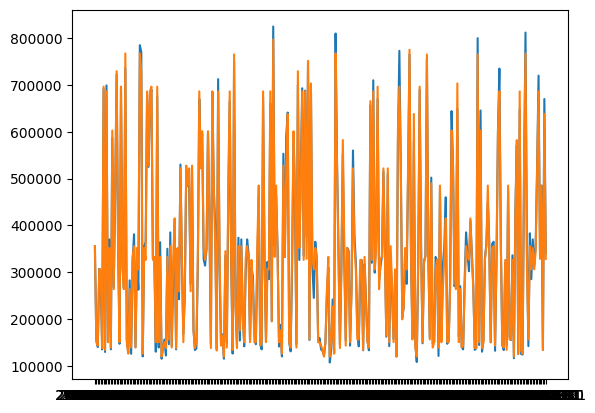

In [87]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [88]:
test_pred = gbf.predict(test[['lagged']])

In [89]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

893379587.2814648
20599.74249762666
13838.789158200263


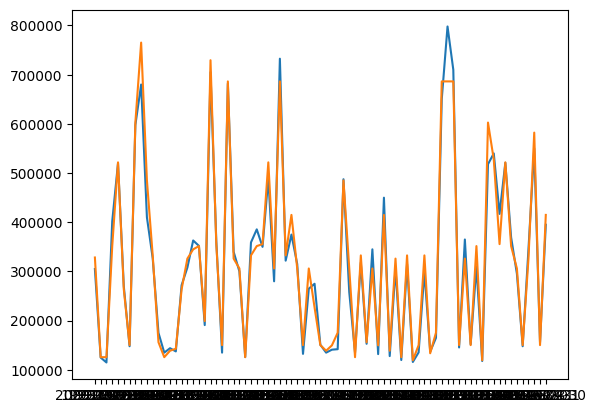

In [91]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

In [9]:
train = nelson[:-30]

In [10]:
test = nelson[-1:]

In [117]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.3, max_depth=1, min_samples_split=5,
                          n_estimators=500, random_state=42)

In [115]:
pred = gbf.predict(train[['lagged']])

In [116]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

381584418.7211928
14072.625998217434
9335.180343082757


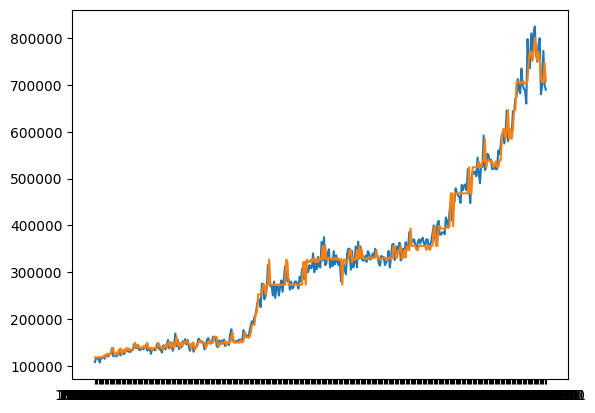

In [117]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [118]:
test_pred = gbf.predict(test[['lagged']])

In [119]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

1600316171.79991
32798.23324126806
29375.312805051566


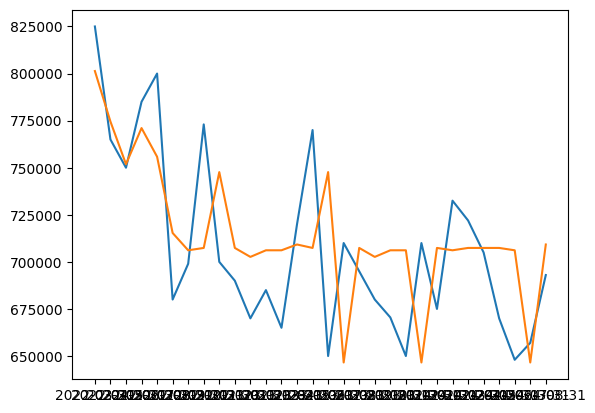

In [120]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

In [170]:
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages
    'max_depth': randint(1, 10),       # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.4), # Learning rate for boosting
    'min_samples_split': randint(2, 20), # Minimum samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples in each leaf
    'subsample': uniform(0.5, 0.5),      # Fraction of samples used for fitting
}

In [171]:
gbr = GradientBoostingRegressor()

In [172]:
rs = RandomizedSearchCV(estimator=gbr, 
                                   param_distributions=param_dist, 
                                   n_iter=200,  # Number of parameter settings to sample
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42,  # Ensures reproducibility
                                   n_jobs=-1)
search = rs.fit(train[['lagged']], train['Nelson'].values)

In [173]:
search.best_params_

{'learning_rate': 0.17454156202267146,
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'n_estimators': 101,
 'subsample': 0.5663727111214849}

In [174]:
test_pred = search.best_estimator_.predict(test[['lagged']])

In [175]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

2439219351.211357
44636.44415441817
42676.32286575693


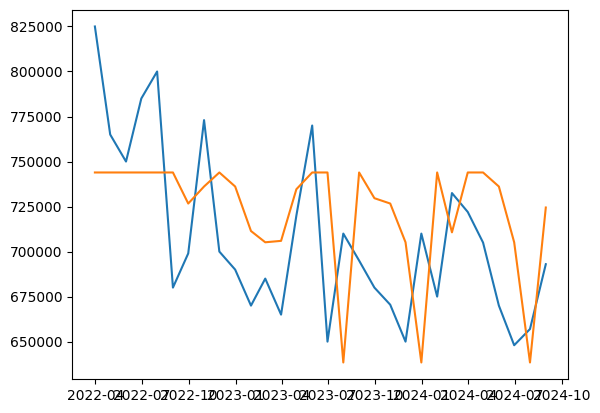

In [176]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

## Predict last value

In [11]:
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages
    'max_depth': randint(1, 10),       # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.4), # Learning rate for boosting
    'min_samples_split': randint(2, 20), # Minimum samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples in each leaf
    'subsample': uniform(0.5, 0.5),      # Fraction of samples used for fitting
}

In [12]:
gbt = GradientBoostingRegressor()

In [14]:
rs = RandomizedSearchCV(estimator=gbt, 
                                   param_distributions=param_dist, 
                                   n_iter=200,  # Number of parameter settings to sample
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42,  # Ensures reproducibility
                                   n_jobs=-1)
search = rs.fit(train[['lagged']], train['Nelson'].values)

In [15]:
search.best_params_

{'learning_rate': 0.26465772864891307,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 128,
 'subsample': 0.6982713911606351}

In [16]:
test_pred = search.best_estimator_.predict(test[['lagged']])

In [17]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

6710618726.510514
81918.36623438308
81918.36623438308


In [19]:
test_pred

array([774918.36623438])

In [20]:
test.Nelson

date
2024-08-31    693000.0
Name: Nelson, dtype: float64

## Randomize training data

In [102]:
train = nelson[:-30]
test = nelson[-30:]
train_randomized = train.sample(frac=1)

In [116]:
params = {
    "n_estimators":3000,
    "learning_rate":0.01,
    "max_depth":1
}

In [117]:
gbt = GradientBoostingRegressor(**params)

In [118]:
gbt.fit(train_randomized[['lagged']], train_randomized[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=3000)

In [119]:
test_pred = gbt.predict(test[['lagged']])

In [120]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

2563004416.6127944
39781.838570813845
27186.91686420713


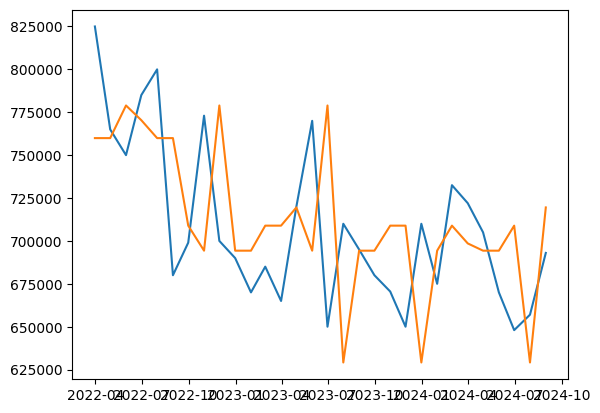

In [121]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

# Nelson_GDP

In [20]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [21]:
gbf = GradientBoostingRegressor(**params)

In [22]:
train, test = train_test_split(nelson_gdp, test_size=0.2, shuffle=False)

In [23]:
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=500, random_state=42)

In [24]:
pred = gbf.predict(train.drop(columns=['Nelson']))

In [25]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

953271.3192339852
759.5144952779822
614.4986191616626


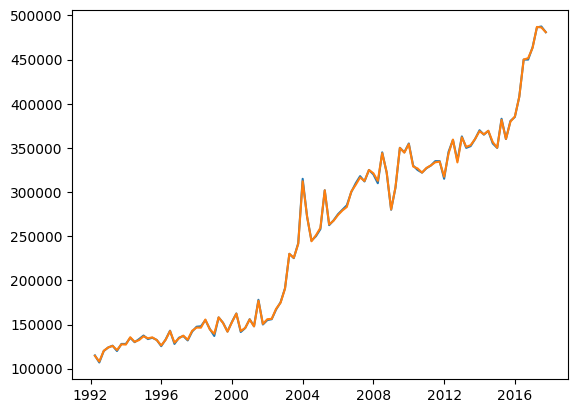

In [26]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [27]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [28]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

41159062375.61325
175570.62920399153
184440.00584287103


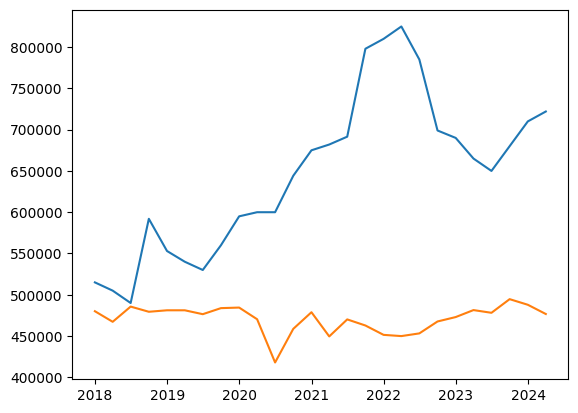

In [29]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

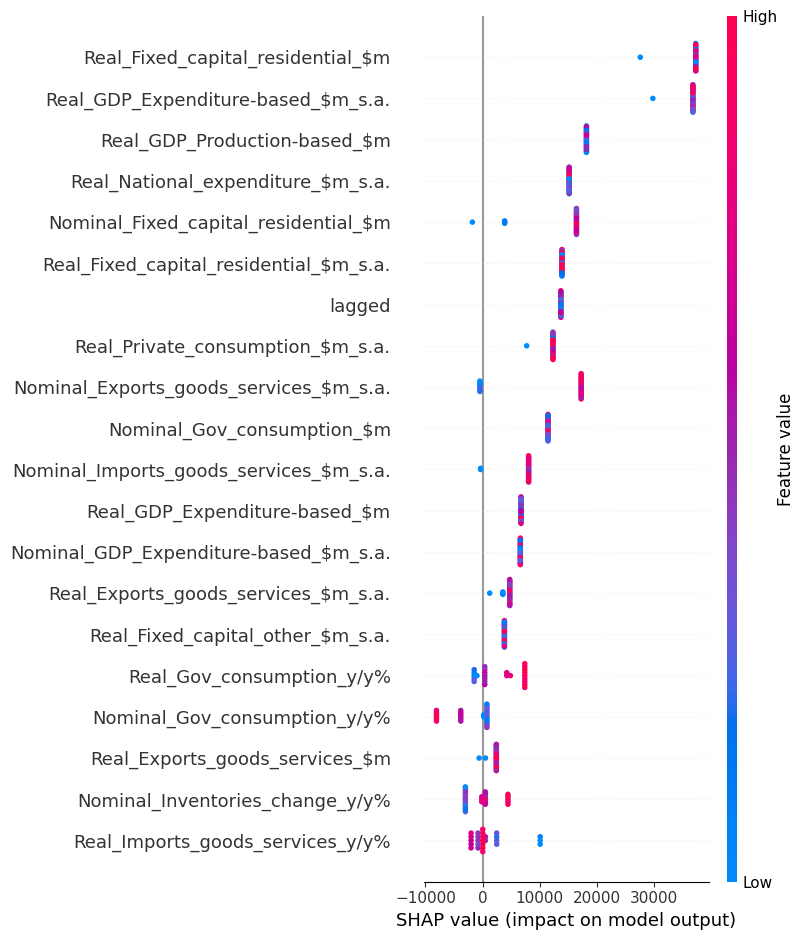

In [31]:
explainer = shap.Explainer(gbf, train.drop(columns=['Nelson']))
shap_values = explainer.shap_values(test.drop(columns=['Nelson']))
shap.summary_plot(shap_values, test.drop(columns=['Nelson']))

In [43]:
shap_headers = [
    "Real_GDP_Production-based_$m",
    "Nominal_GDP_Expenditure-based_$m_s.a.",
    "Real_GDP_Expenditure-based_$m",
    "Real_Private_consumption_$m_s.a.",
    "Nominal_Gov_consumption_$m",
    "Real_Gov_consumption_y/y%",
    "Nominal_Inventories_change_y/y%",
    "Real_Fixed_capital_residential_$m",
    "Real_Fixed_capital_residential_$m_s.a.",
    "Nominal_Fixed_capital_residential_$m",
    "Real_Fixed_capital_other_$m_s.a.",
    "Real_National_expenditure_$m_s.a.",
    "Real_Exports_goods_services_$m",
    "Real_Exports_goods_services_$m_s.a.",
    "Nominal_Exports_goods_services_$m_s.a.",
    "Real_Imports_goods_services_y/y%",
    "Nominal_Imports_goods_services_$m_s.a.",
    "lagged",
    "Nelson"
]

In [44]:
nelson_gdp[shap_headers].head(5)

,Real_GDP_Production-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Real_GDP_Expenditure-based_$m,Real_Private_consumption_$m_s.a.,Nominal_Gov_consumption_$m,Real_Gov_consumption_y/y%,Nominal_Inventories_change_y/y%,Real_Fixed_capital_residential_$m,Real_Fixed_capital_residential_$m_s.a.,Nominal_Fixed_capital_residential_$m,Real_Fixed_capital_other_$m_s.a.,Real_National_expenditure_$m_s.a.,Real_Exports_goods_services_$m,Real_Exports_goods_services_$m_s.a.,Nominal_Exports_goods_services_$m_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m_s.a.,lagged,Nelson
date,,,,,,,,,,,,,,,,,,,
1992-03-31,27933,19305,27481,15624,3490,0.9,266,710,781,1498,2723,18989,5779,5583,6713,8.8,5559,108000.0,115000.0
1992-06-30,27522,19485,27552,15553,3930,0.3,104,811,782,1701,2637,18792,6353,6115,7216,16.4,5488,115000.0,107000.0
1992-09-30,27239,18973,25724,15492,3546,2.7,179,750,753,1576,2638,18422,5670,6031,7003,18.9,5570,116000.0,120000.0
1992-12-31,29195,19515,28788,15741,3736,1.5,212,843,799,1757,2726,19091,5975,6060,7030,15.6,5743,122500.0,124000.0
1993-03-31,28529,20291,28138,15686,3558,0.2,231,747,823,1555,2858,19535,6436,6209,7086,3.4,5626,125000.0,126000.0


In [75]:
params = {
    "n_estimators": 20,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.4,
    "loss": "squared_error",
    "random_state": 42
}

In [76]:
gbf = GradientBoostingRegressor(**params)

In [77]:
train, test = train_test_split(nelson_gdp[shap_headers], test_size=0.2, shuffle=False)

In [78]:
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.4, max_depth=1, min_samples_split=5,
                          n_estimators=20, random_state=42)

In [79]:
pred = gbf.predict(train.drop(columns=['Nelson']))

In [80]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

108819714.70436417
7465.825846452801
5303.282599735627


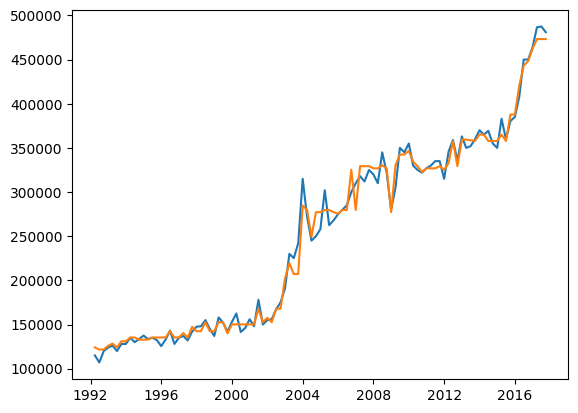

In [81]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [82]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [83]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

38965938561.30081
173070.78947014236
184703.06230149276


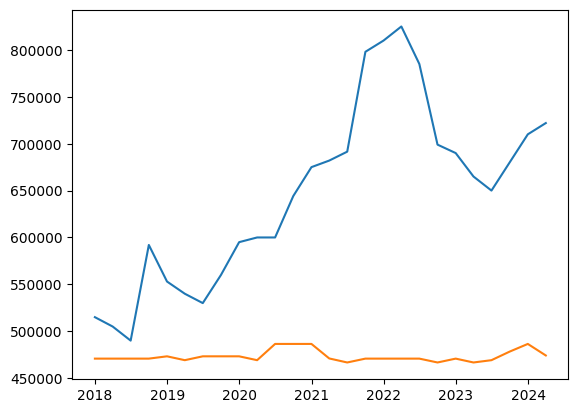

In [84]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

## Randomise Nelson_GDP dataset

In [132]:
train = nelson_gdp[:-20]
test = nelson_gdp[-20:]
train_randomized = train.sample(frac=1)

In [139]:
params = {
    "n_estimators":3000,
    "learning_rate":0.01,
    "max_depth":1
}

In [140]:
gbt = GradientBoostingRegressor(**params)

In [141]:
gbt.fit(train_randomized.drop(columns=['Nelson', 'lagged']), train_randomized[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=3000)

In [142]:
test_pred = gbt.predict(test.drop(columns=['Nelson', 'lagged']))

In [143]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

25233923445.40616
138958.35628042548
129688.58688881891


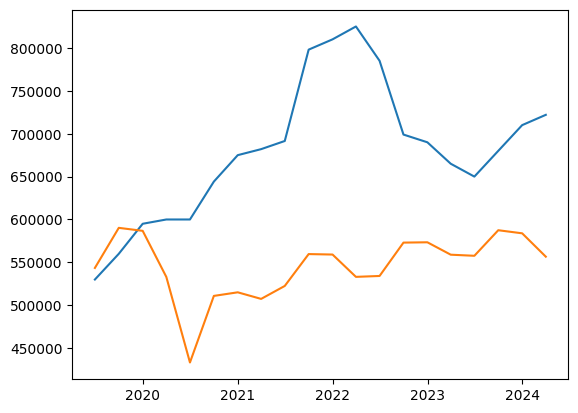

In [144]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

# Feature Engineering

In [85]:
def addFeatures(df):    
    for c in df.columns:
        if c == 'nelson':
            continue
        df[f'{c}_rolling_year'] = (df[c] - df[c].rolling(4).mean())
        df[f'{c}_rolling_half_year'] = (df[c] - df[c].rolling(2).mean())
        df[f'{c}_r_sum_3'] = df[c].rolling(3, 1).sum()
        df[f'{c}_r_sum_6'] = df[c].rolling(6, 1).sum() 
        df[f'{c}_r_sum_12'] = df[c].rolling(12, 1).sum()
        df[f'{c}_r_sum_8'] = df[c].rolling(8, 1).sum()
        df[f'{c}_r_sum_4'] = df[c].rolling(4, 1).sum()
        df[f'{c}_r_sum_8_yd'] = df[f'{c}_r_sum_8'] - df[f'{c}_r_sum_8'].shift(1)
        df[f'{c}_r_sum_4_yd'] = df[f'{c}_r_sum_4'] - df[f'{c}_r_sum_4'].shift(1)
        df[f'{c}_r_sum_12_diff'] = (df[c] - df[c].rolling(12, 1).sum())
        df[f'{c}_r_sum_8_diff'] = (df[c] - df[c].rolling(8, 1).sum())
        df[f'{c}_r_sum_4_diff'] = (df[c] - df[c].rolling(4, 1).sum())
        df[f'{c}_r_sum_12_sd'] = (df[c] - df[c].shift(12).rolling(12, 1).sum())
        df[f'{c}_r_sum_8_sd'] = (df[c] - df[c].shift(8).rolling(8, 1).sum()) 
        df[f'{c}_r_sum_4_sd'] = (df[c] - df[c].shift(4).rolling(4, 1).sum())
        df[f'{c}_annual_percent_change_quarter'] = (df[c] - df[c].shift(8) ) / [val if val > 0 else 1 for val in (df[c].shift(8) * 100)]
    return df

In [90]:
nelson_gdp_feat = addFeatures(nelson_gdp[shap_headers])

In [106]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.3,
    "loss": "squared_error",
    "random_state": 42
}
gbf = GradientBoostingRegressor(**params)

In [107]:
train, test = train_test_split(nelson_gdp_feat.fillna(0), test_size=0.2, shuffle=False)
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)
pred = gbf.predict(train.drop(columns=['Nelson']))

In [108]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

4847.229907690501
57.72278226134356
50.54042480379576


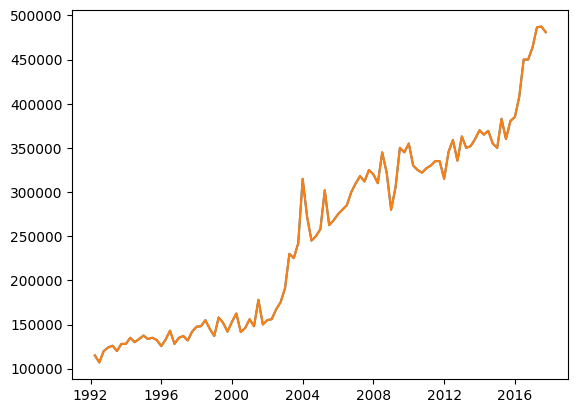

In [109]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [110]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [111]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

39254838593.867874
172203.5062057851
197062.10573095296


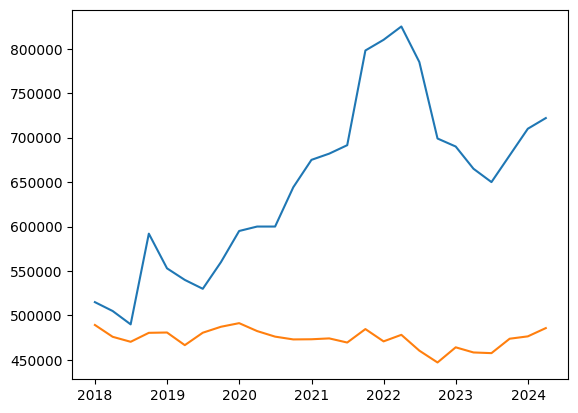

In [112]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

## Nelson_labour dataset 

In [170]:
df = xi.compute_xi_correlation(nelson_labour, nelson_labour.Nelson)
mask = np.where(df.Nelson.values > 0.8)
df.iloc[mask].index

In [182]:
df_filtered = nelson_labour[df.iloc[mask].index]

In [184]:
df_filtered.head(5)

,Nelson,lagged,Labour force Employed (000s s.a.),Labour force Total (000s s.a.),Not in labour force (000s s.a.),Working-age population (000s s.a.),Labour cost index (LCI) (Index),Average hourly earnings (ordinary time and overtime) ($),Private sector wages ($),Public sector wages ($)
date,,,,,,,,,,
1994-03-31,135000.0,125000.0,1582,1744,983,2728,709,14.94,14.29,16.94
1994-06-30,130000.0,132000.0,1599,1749,988,2737,710,15.06,14.45,16.97
1994-09-30,133500.0,133000.0,1620,1761,988,2748,714,15.05,14.47,16.87
1994-12-31,137500.0,141000.0,1643,1778,979,2758,715,15.12,14.48,17.17
1995-03-31,133500.0,135000.0,1662,1783,987,2770,718,15.23,14.59,17.38


In [187]:
train = df_filtered[:-20]
test = df_filtered[-20:]

In [214]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "learning_rate": 0.2,
    "random_state": 42
}
gbf = GradientBoostingRegressor(**params)

In [215]:
gbf.fit(train.drop(columns=['Nelson', 'lagged']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, n_estimators=500,
                          random_state=42)

In [216]:
test_pred = gbf.predict(test.drop(columns=['Nelson', 'lagged']))

In [217]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 28477196793.7193
MAE: 152644.882084884
MDAE: 147456.09620251274


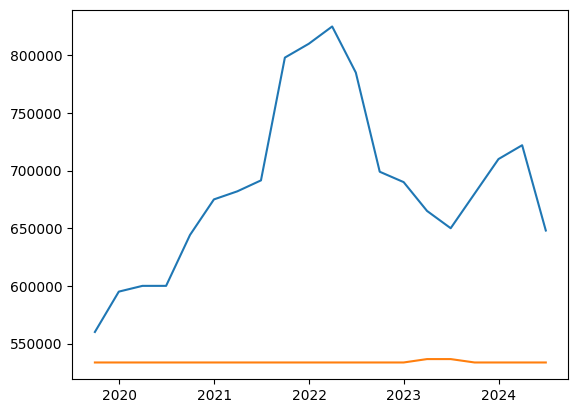

In [218]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)